## EDA With Red Wine Data

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests):
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data):
- 12 - quality (score between 0 and 10)

In [7]:
import pandas as pd
df=pd.read_csv('winequality-red.csv',delimiter=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
## descriptive summary of the dataset
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
df.shape

(1599, 12)

In [11]:
## List down all the columns names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
## Missing values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
## Duplicate records
df[df.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

In [15]:
## Remove the duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1359, 12)

In [17]:
## Correlation
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.255124     0.667437   
volatile acidity          -0.255124          1.000000    -0.551248   
citric acid                0.667437         -0.551248     1.000000   
residual sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free sulfur dioxide       -0.140580         -0.020945    -0.048004   
total sulfur dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.111025   0.085886            -0.140580   
volatile acidity           -0.002449   0.055154            -0.020945   
citric acid                 0.143892   0.210195            -0.048004   
residual sugar              1.000000   0.026656             0.160527   
chlorides                   0.026656   1.000000             0.000749   
free sulfur dioxide         0.160527   0.000749             1.000000   
total sulfur dioxide        0.201038   0.045773             0.667246   
density                     0.324522   0.193592            -0.018071   
pH                         -0.083143  -0.270893             0.056631   
sulphates                  -0.011837   0.394557             0.054126   
alcohol                     0.063281  -0.223824            -0.080125   
quality                     0.013640  -0.130988            -0.050463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.103777  0.670195 -0.686685   0.190269   
volatile acidity                  0.071701  0.023943  0.247111  -0.256948   
citric acid                       0.047358  0.357962 -0.550310   0.326062   
residual sugar                    0.201038  0.324522 -0.083143  -0.011837   
chlorides                         0.045773  0.193592 -0.270893   0.394557   
free sulfur dioxide               0.667246 -0.018071  0.056631   0.054126   
total sulfur dioxide              1.000000  0.078141 -0.079257   0.035291   
density                           0.078141  1.000000 -0.355617   0.146036   
pH                               -0.079257 -0.355617  1.000000  -0.214134   
sulphates                         0.035291  0.146036 -0.214134   1.000000   
alcohol                          -0.217829 -0.504995  0.213418   0.091621   
quality                          -0.177855 -0.184252 -0.055245   0.248835   

                       alcohol   quality  
fixed acidity        -0.061596  0.119024  
volatile acidity     -0.197812 -0.395214  
citric acid           0.105108  0.228057  
residual sugar        0.063281  0.013640  
chlorides            -0.223824 -0.130988  
free sulfur dioxide  -0.080125 -0.050463  
total sulfur dioxide -0.217829 -0.177855  
density              -0.504995 -0.184252  
pH                    0.213418 -0.055245  
sulphates             0.091621  0.248835  
alcohol               1.000000  0.480343  
quality               0.480343  1.000000

<Axes: >

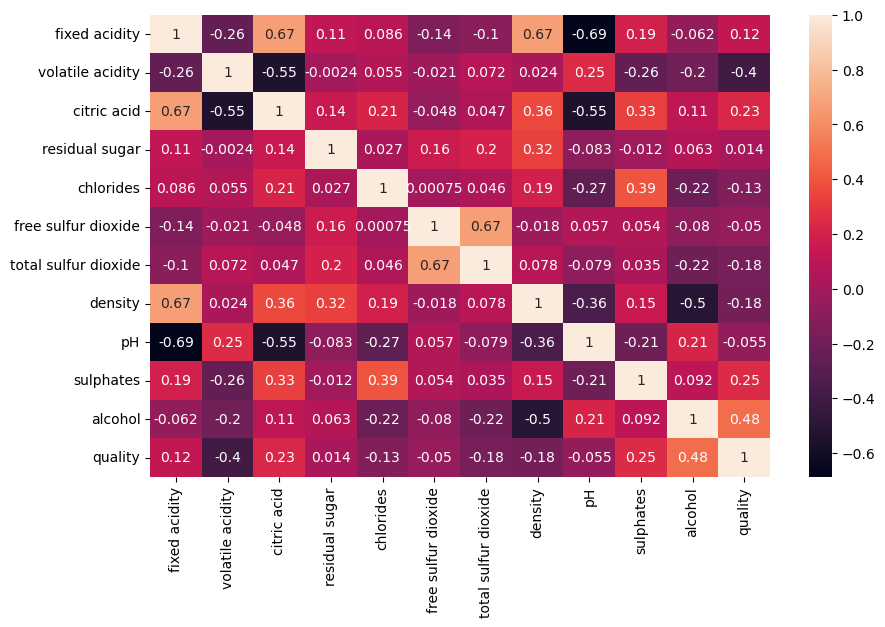

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

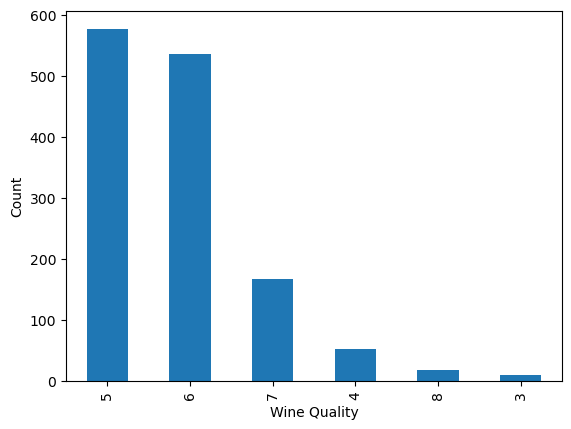

In [19]:
## Visualization
#conclusion- It is an imbalanced dataset
df.quality.value_counts().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

In [20]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

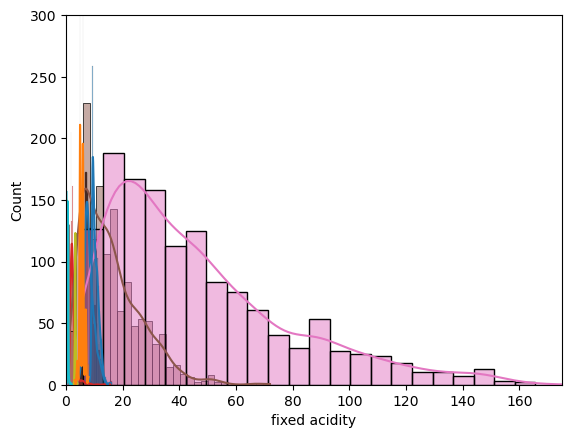

In [27]:
for column in df.columns:
    sns.histplot(df[column],kde=True)

    plt.xlim(0, 175)  # Set x-axis limits
    plt.ylim(0, 300) # Set y-axis limits

<Axes: xlabel='alcohol', ylabel='Count'>

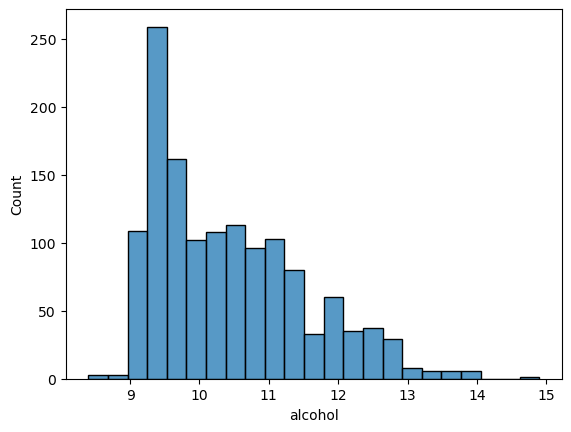

In [28]:
sns.histplot(df['alcohol'])

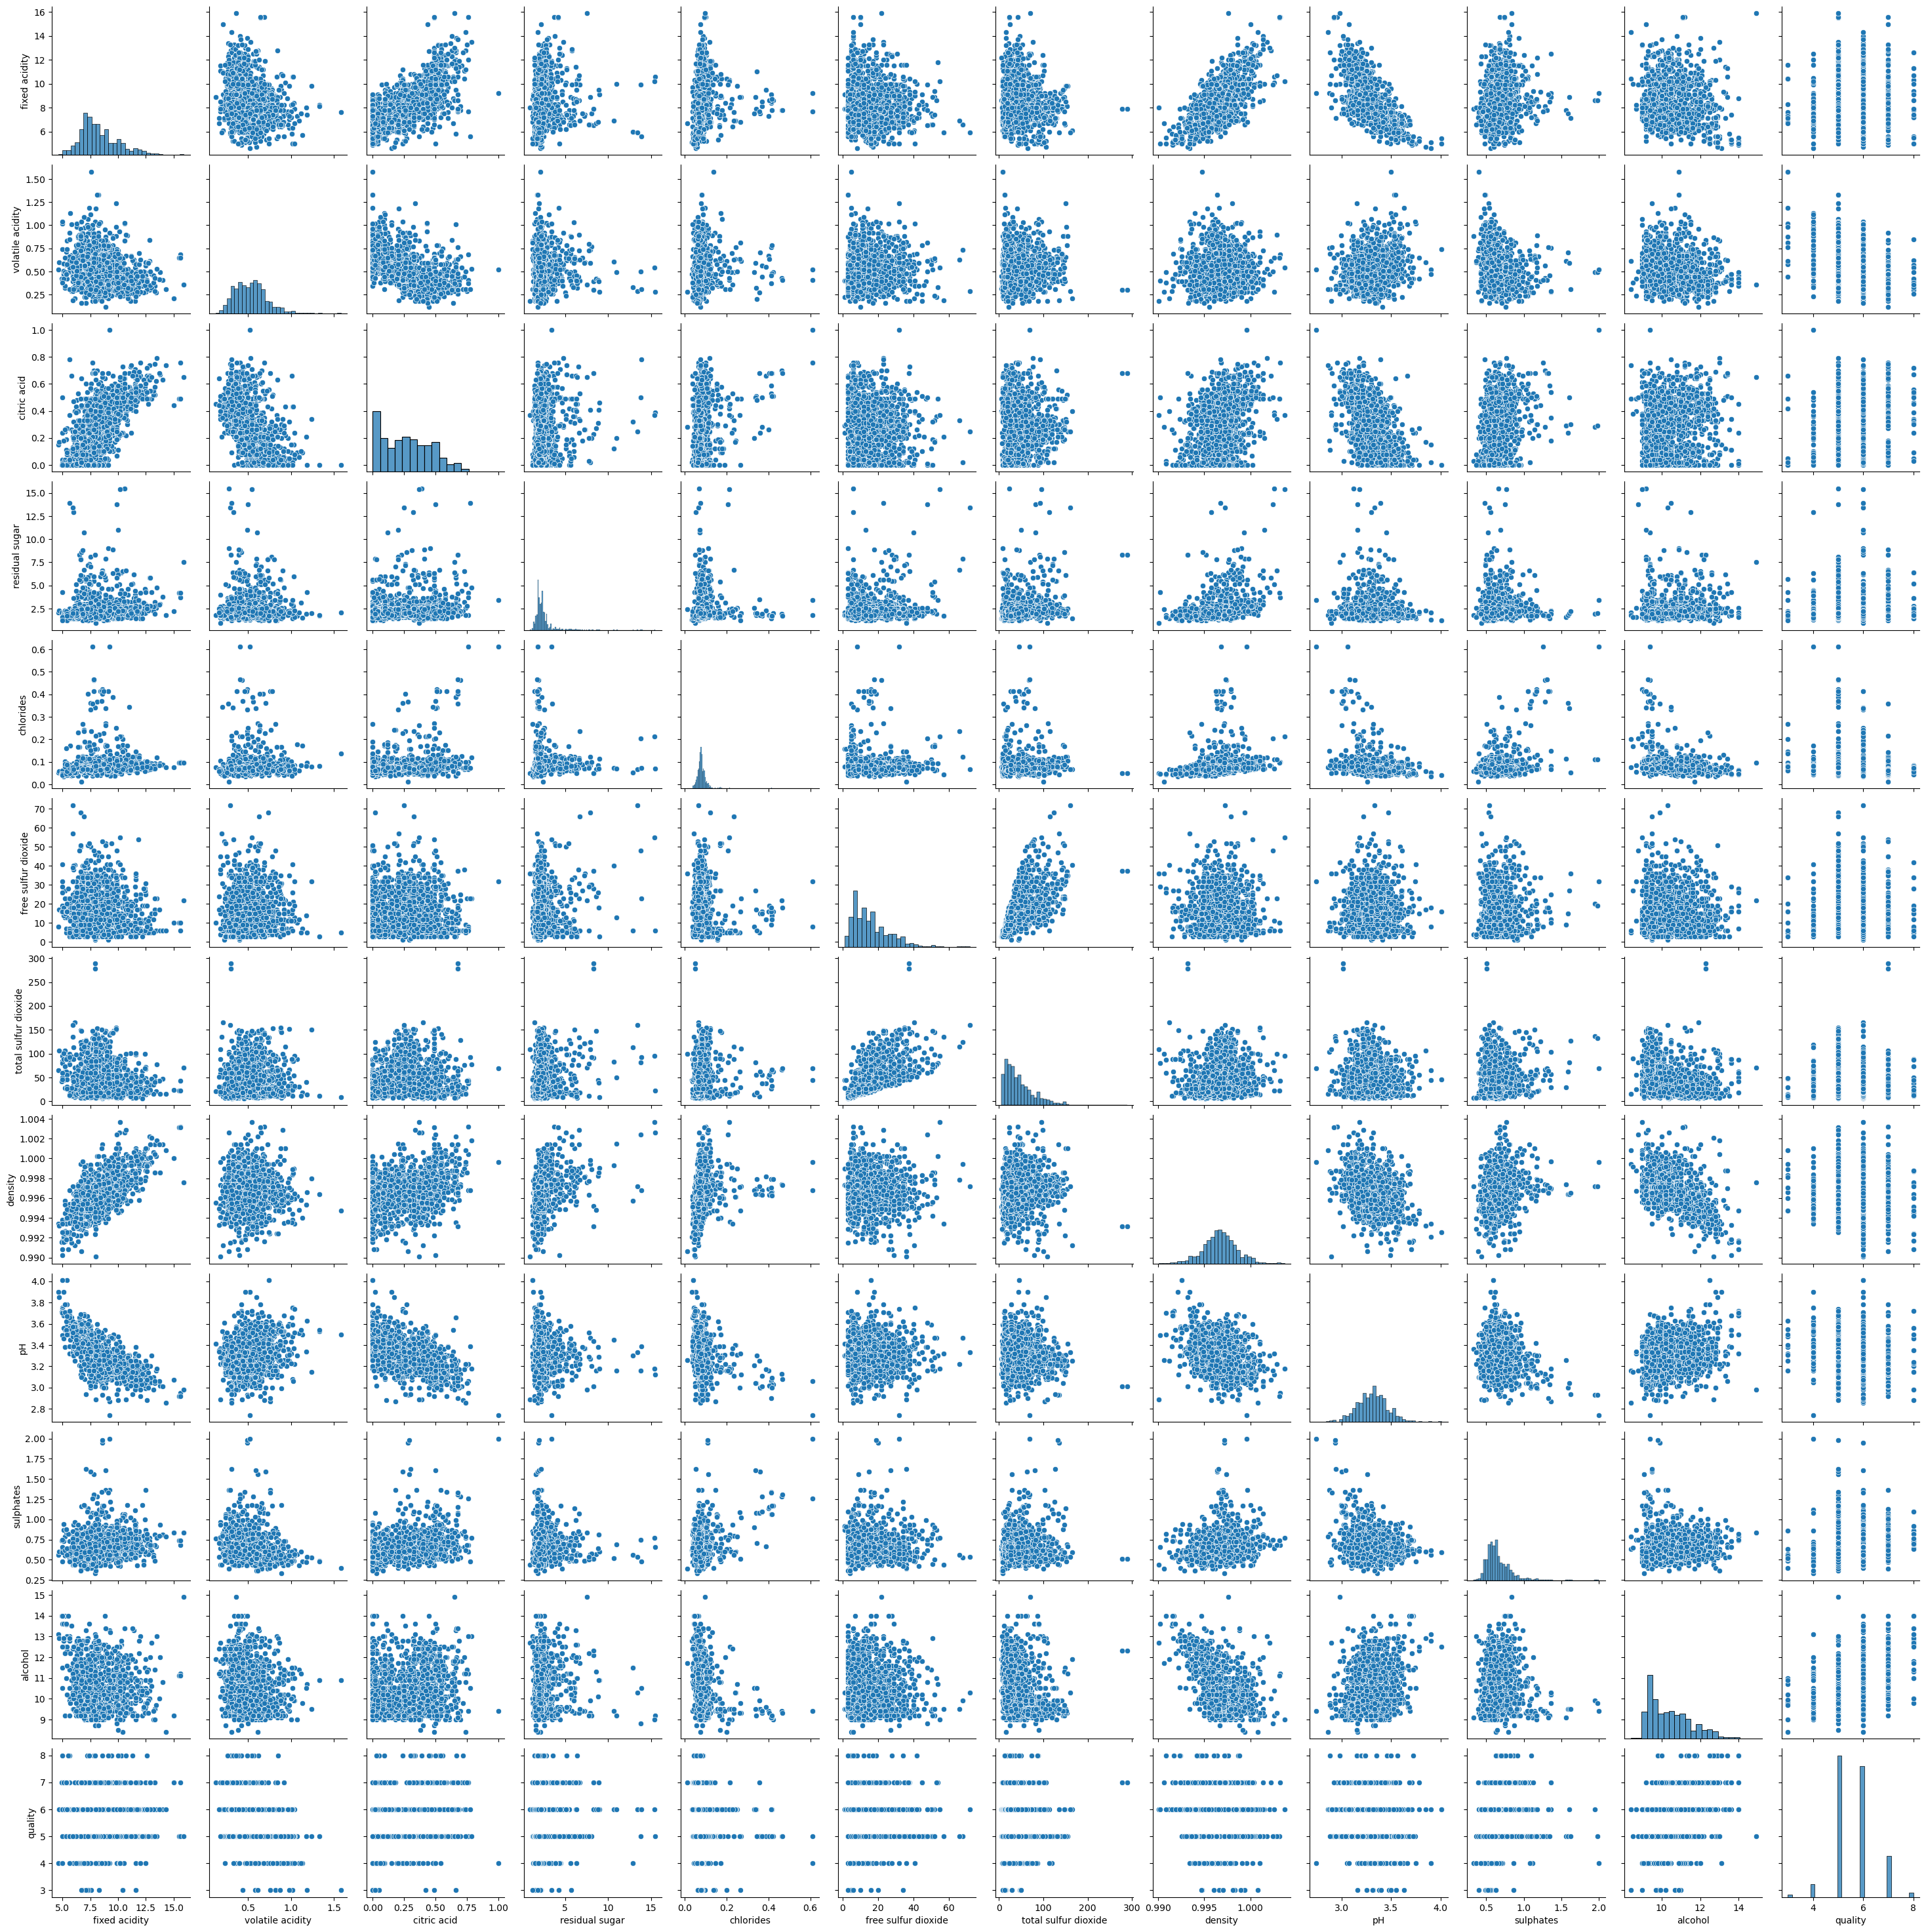

In [29]:
#univariate,bivariate,multivariate analysis
sns.pairplot(df)

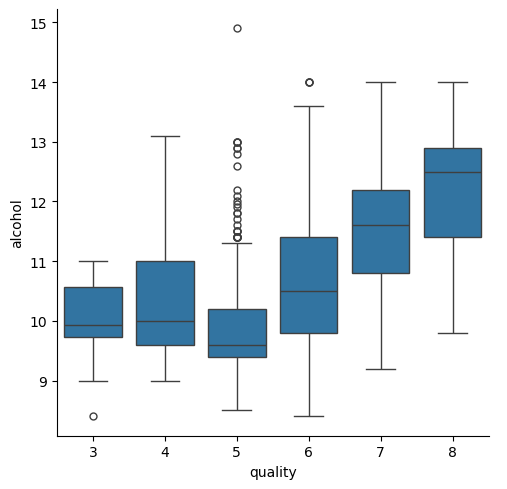

In [30]:
##categorical Plot
sns.catplot(x='quality', y='alcohol', data=df, kind="box")

In [31]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

<Axes: xlabel='alcohol', ylabel='pH'>

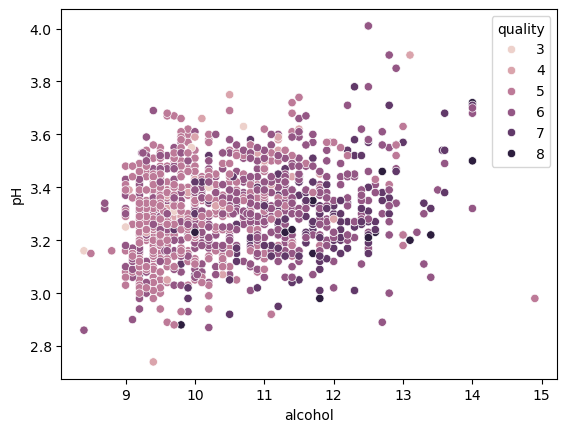

In [32]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)

In [60]:
df1=pd.read_csv('winequality-white.csv',delimiter=';')
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [61]:
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [63]:
df1.shape

(4898, 12)

In [64]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [66]:
df1[df1.duplicated()]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4              0.23         0.35            10.3      0.042   
4850            7.0              0.36         0.35             2.5      0.048   
4851            6.4              0.33         0.44             8.9      0.055   
4856            7.1              0.23         0.39            13.7      0.058   
4880            6.6              0.34         0.40             8.1      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality  
4      9.900000        6  
5     10.100000        6  
7      8.800000        6  
8      9.500000        6  
20    12.800000        8  
...         ...      ...  
4828   9.200000        5  
4850  11.100000        6  
4851   9.600000        5  
4856   9.000000        6  
4880   9.533333        6  

[937 rows x 12 columns]

In [67]:
# remove the duplicates

df1.drop_duplicates(inplace=True)

In [68]:
df1.shape

(3961, 12)

In [69]:
df1.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.124636         -0.190678     0.007065   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.083620   0.024036            -0.058396   
volatile acidity            0.098340   0.086287            -0.102471   
citric acid                 0.106269   0.132590             0.091681   
residual sugar              1.000000   0.076091             0.306835   
chlorides                   0.076091   1.000000             0.101272   
free sulfur dioxide         0.306835   0.101272             1.000000   
total sulfur dioxide        0.409583   0.191145             0.619437   
density                     0.820498   0.253088             0.294638   
pH                         -0.165997  -0.090573            -0.007750   
sulphates                  -0.020503   0.017871             0.037932   
alcohol                    -0.398167  -0.356928            -0.251768   
quality                    -0.117339  -0.217739             0.010507   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.082425  0.266091 -0.431274  -0.017453   
volatile acidity                  0.102315  0.060603 -0.046954  -0.021150   
citric acid                       0.122845  0.160076 -0.183015   0.049442   
residual sugar                    0.409583  0.820498 -0.165997  -0.020503   
chlorides                         0.191145  0.253088 -0.090573   0.017871   
free sulfur dioxide               0.619437  0.294638 -0.007750   0.037932   
total sulfur dioxide              1.000000  0.536868  0.008239   0.136544   
density                           0.536868  1.000000 -0.063734   0.082048   
pH                                0.008239 -0.063734  1.000000   0.142353   
sulphates                         0.136544  0.082048  0.142353   1.000000   
alcohol                          -0.446643 -0.760162  0.093095  -0.022850   
quality                          -0.183356 -0.337805  0.123829   0.053200   

                       alcohol   quality  
fixed acidity        -0.110788 -0.124636  
volatile acidity      0.046815 -0.190678  
citric acid          -0.076514  0.007065  
residual sugar       -0.398167 -0.117339  
chlorides            -0.356928 -0.217739  
free sulfur dioxide  -0.251768  0.010507  
total sulfur dioxide -0.446643 -0.183356  
density              -0.760162 -0.337805  
pH                    0.093095  0.123829  
sulphates            -0.022850  0.053200  
alcohol               1.000000  0.462869  
quality               0.462869  1.000000

<Axes: >

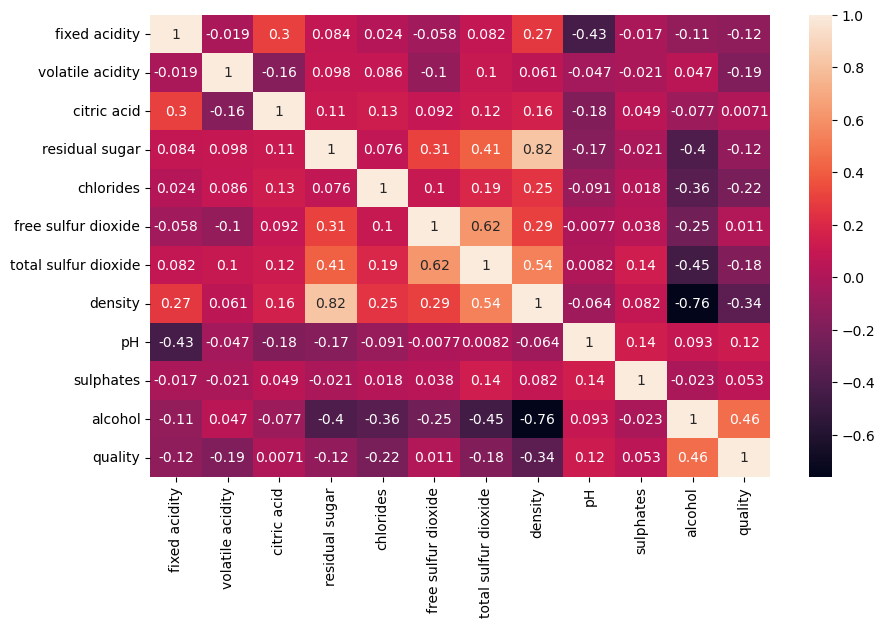

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True)

In [72]:
df1.quality.value_counts()

quality
6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: count, dtype: int64

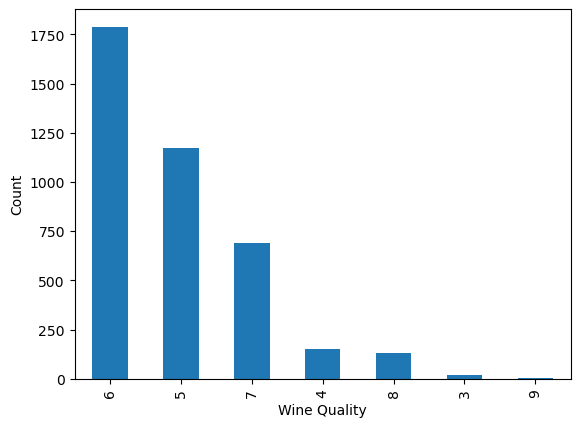

In [73]:
df1.quality.value_counts().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

In [75]:
df1.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
6      9.6        6

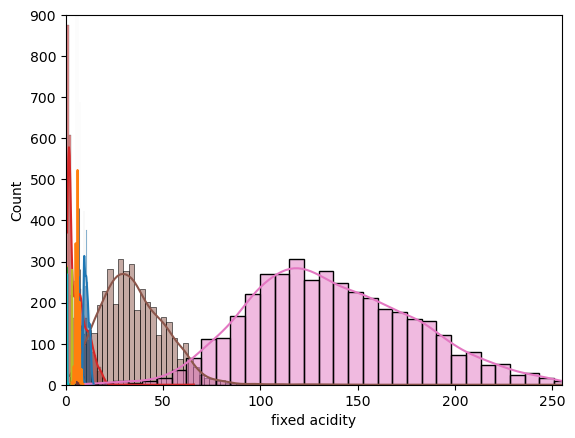

In [78]:
for column in df1.columns:
    sns.histplot(df1[column],kde=True)

    plt.xlim(0, 255)  # Set x-axis limits
    plt.ylim(0, 900) # Set y-axis limits

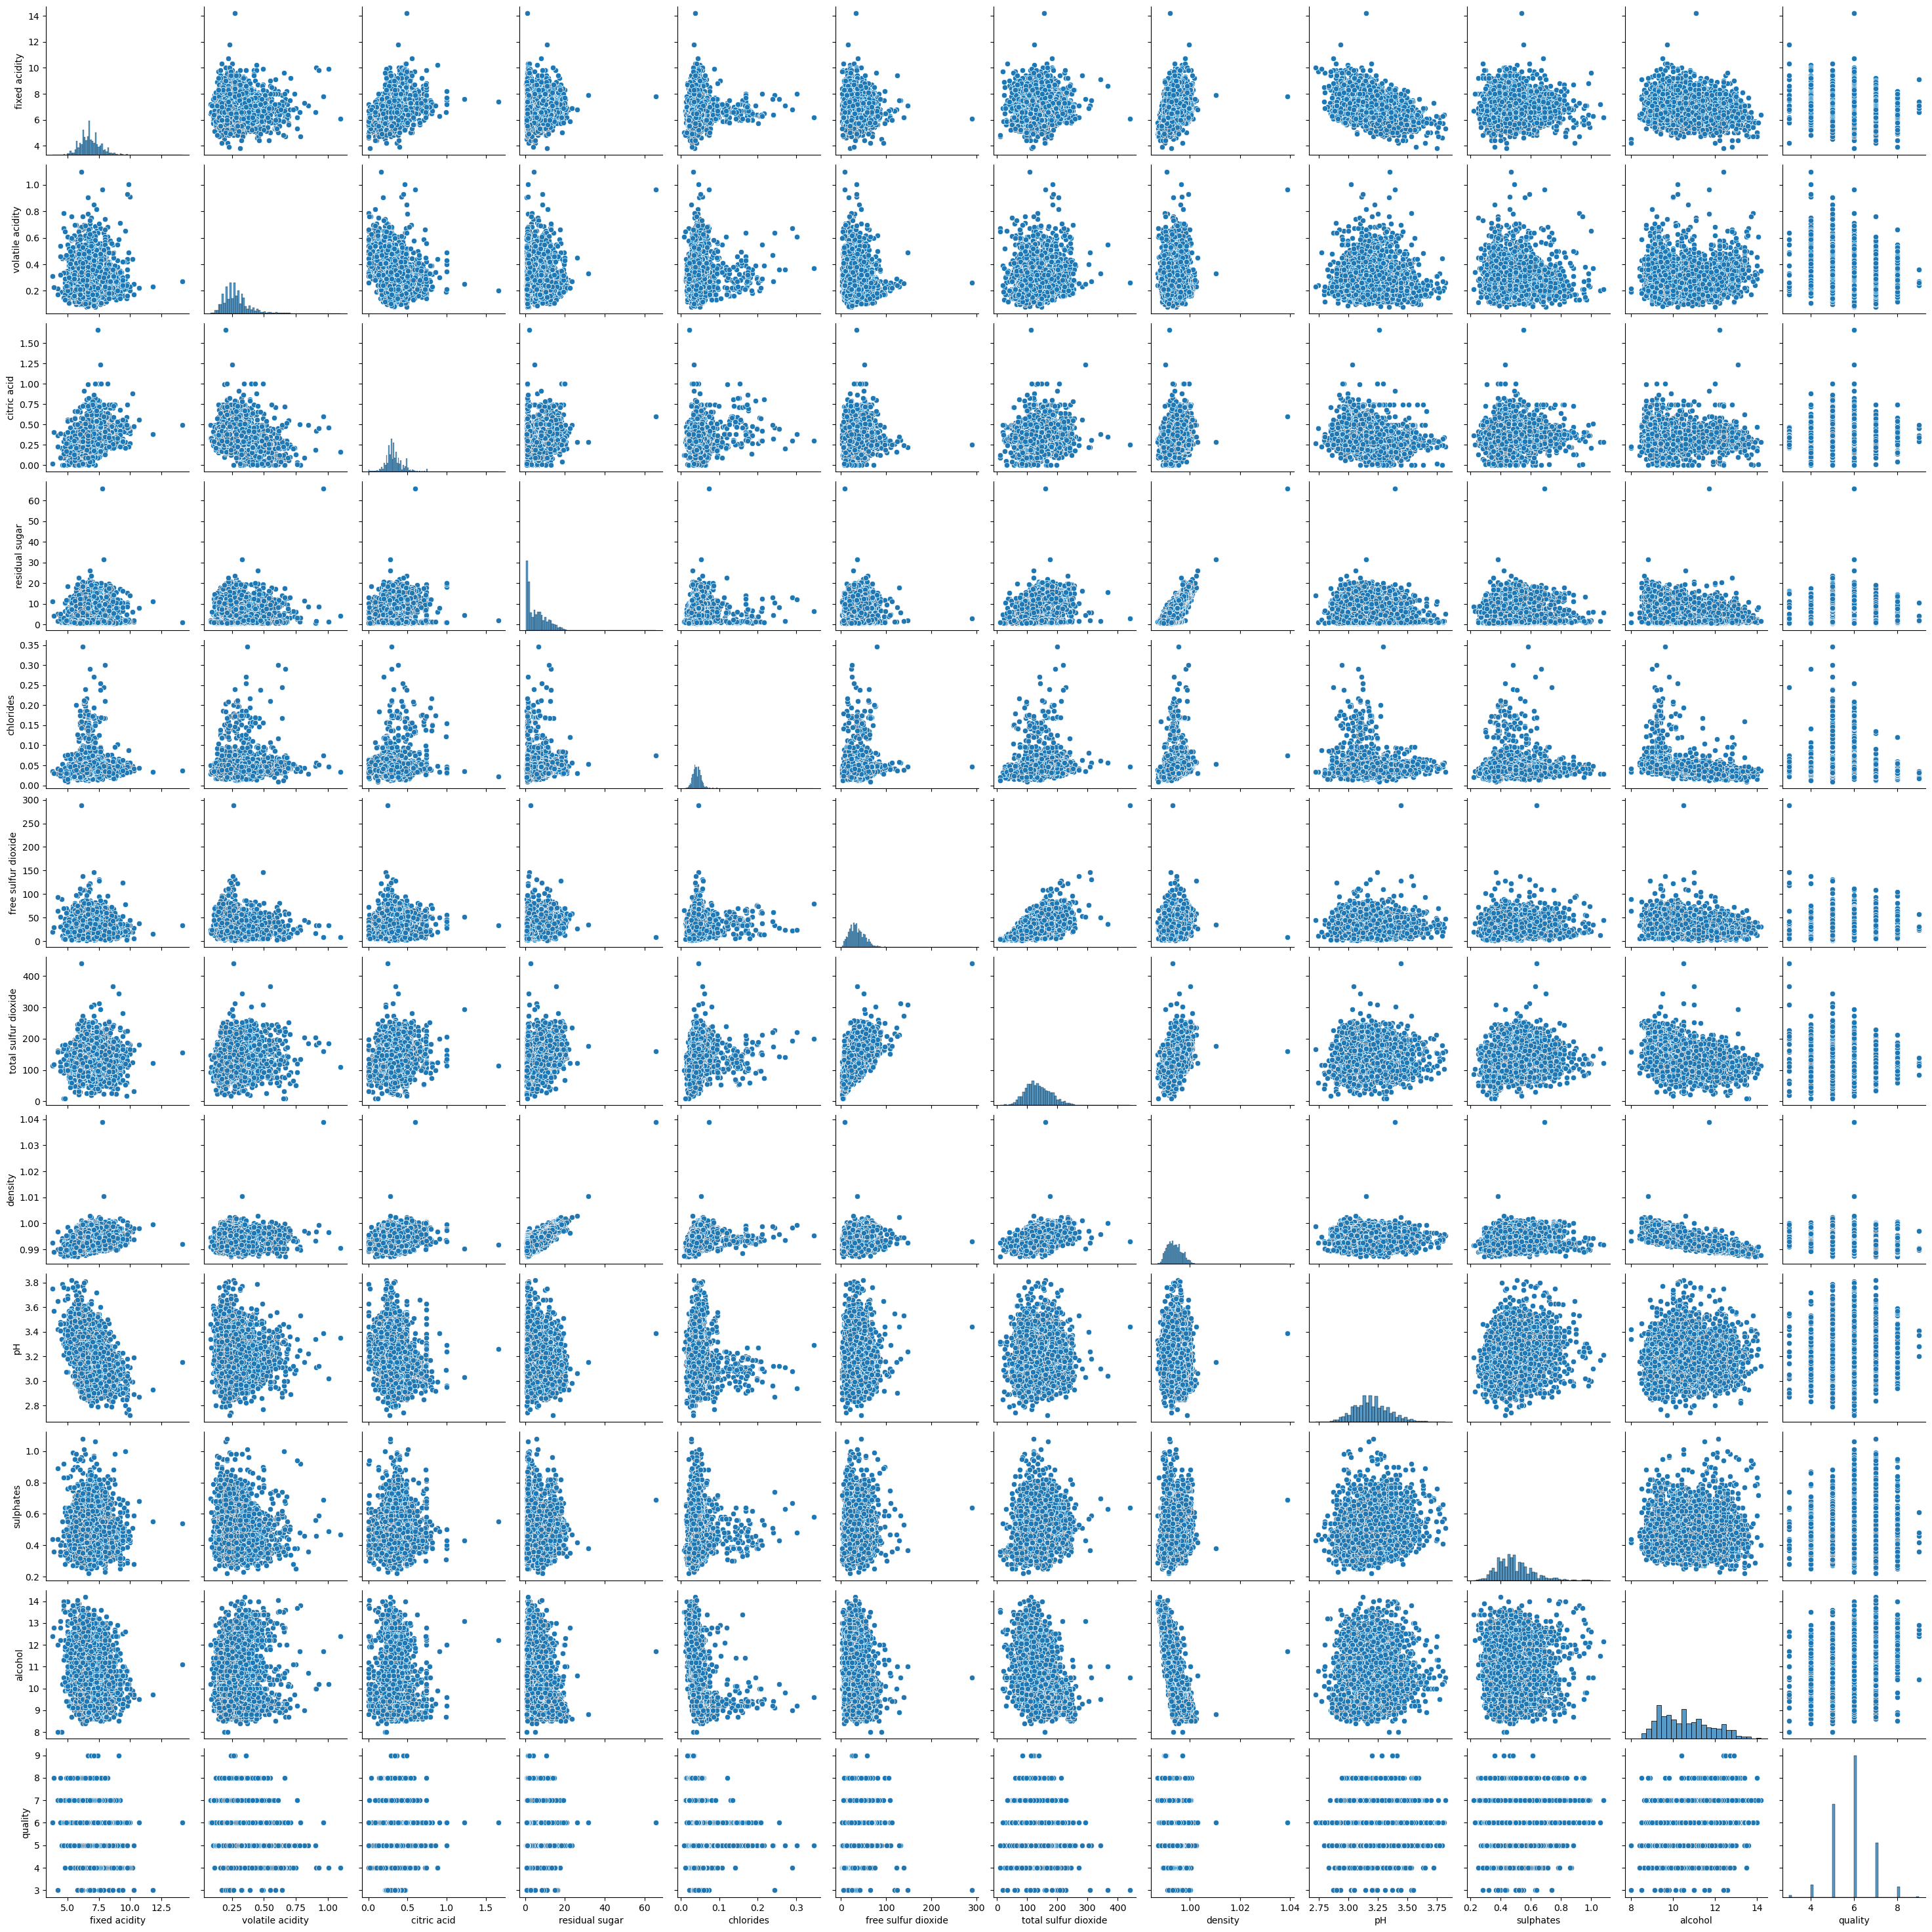

In [80]:
sns.pairplot(df1)

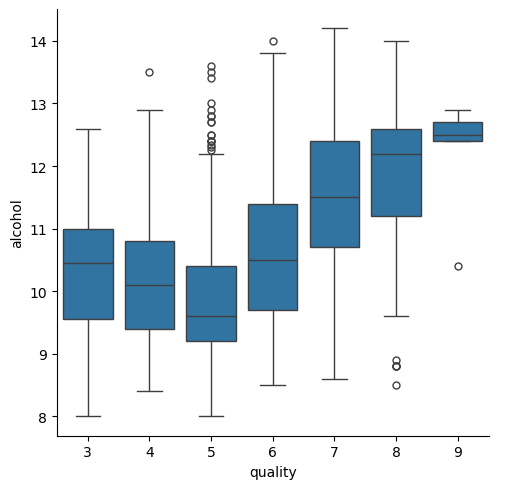

In [81]:
sns.catplot(x="quality",y="alcohol",data=df1,kind='box')

<Axes: xlabel='alcohol', ylabel='pH'>

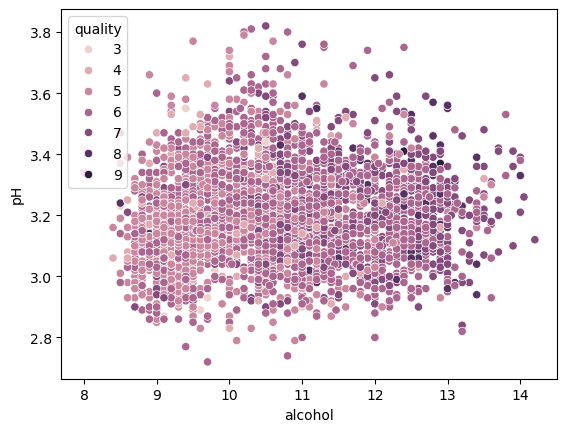

In [82]:
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df1)